## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/bread%20basket.csv')

# Show the first five transactions
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

information whether or not the dataset has missing values, total data in the dataset and the data type of each column.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-ff95d91b8088>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date
<ipython-input-5-ff95d91b8088>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour


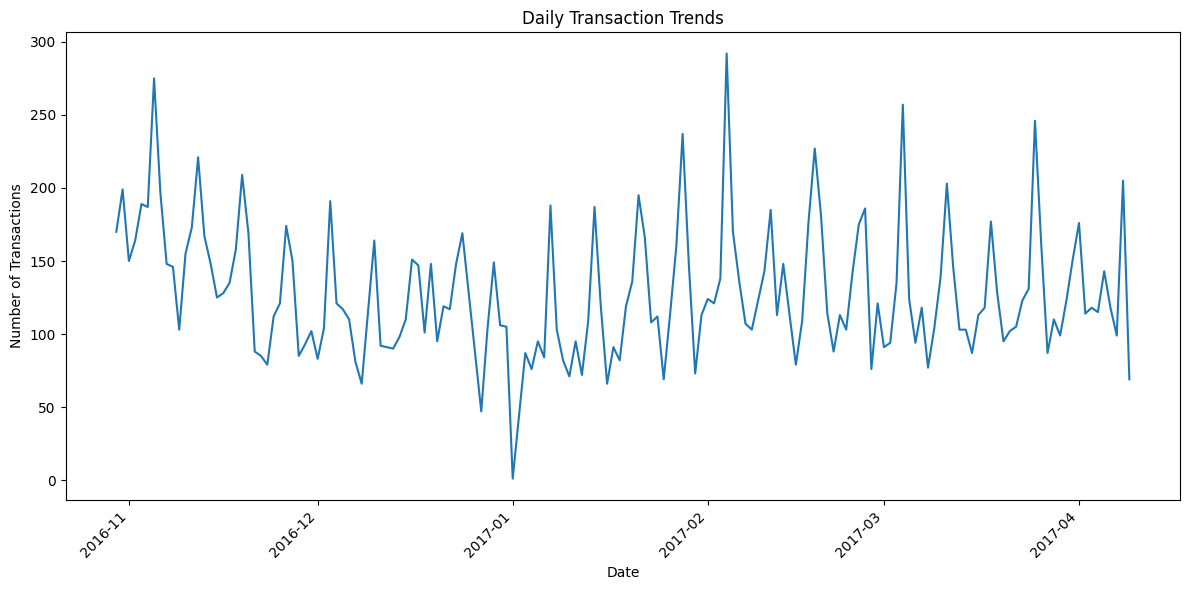

In [5]:
# 5
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

# Group by date and count transactions
daily_transactions = df.groupby('date')['Transaction'].count().reset_index()

# Plotting the daily transaction trends
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['date'], daily_transactions['Transaction'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [6]:
# 6
df['date_time'] = pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

# Display the DataFrame
df[['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend', 'day', 'month', 'year', 'time', 'hour', 'day_name']].sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-8e21a82b0aaf>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
8114,4070,Farm House,2016-12-31 13:49:00,afternoon,weekend,31,12,2016,13:49:00,13,Saturday
6542,3282,Coffee,2016-12-16 13:42:00,afternoon,weekday,16,12,2016,13:42:00,13,Friday
11564,5748,Pastry,2017-02-01 13:41:00,afternoon,weekday,1,2,2017,13:41:00,13,Wednesday
19035,9015,Cake,2017-03-29 13:37:00,afternoon,weekday,29,3,2017,13:37:00,13,Wednesday
17541,8335,Cookies,2017-03-18 10:03:00,morning,weekend,18,3,2017,10:03:00,10,Saturday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


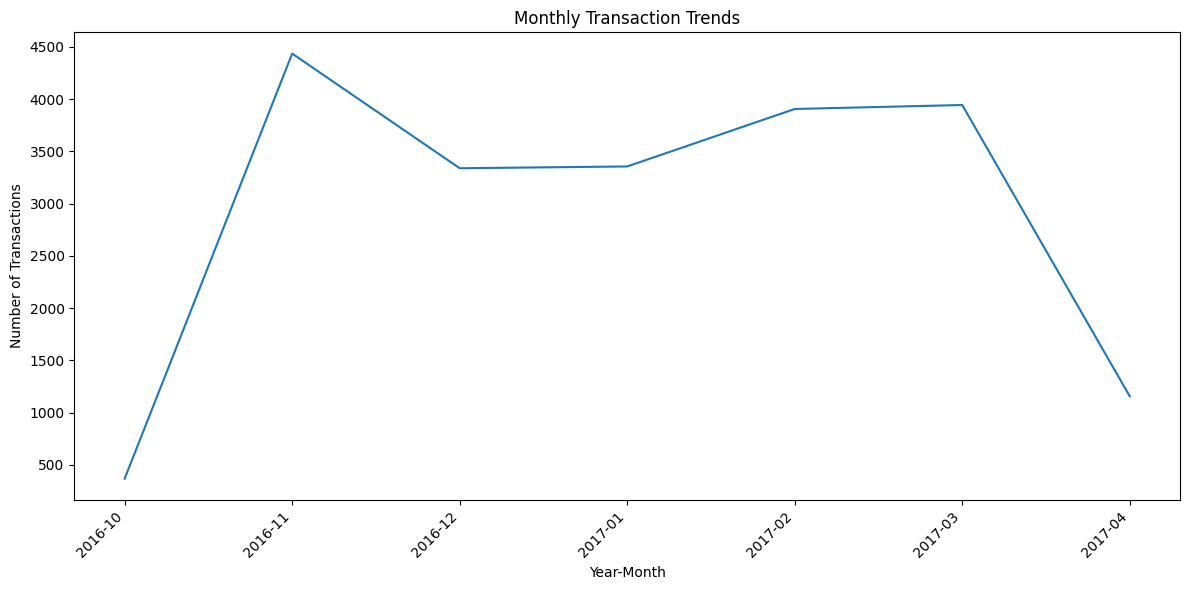

In [7]:
# 7
# Create a 'Year-Month' column
df['Year_Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Group by 'Year-Month' and count transactions
monthly_transactions = df.groupby('Year_Month')['Transaction'].count().reset_index()

# Plotting the monthly transaction trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['Year_Month'], monthly_transactions['Transaction'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The visualization highlights monthly transaction trends, showing a notable spike in November 2016, likely driven by promotions or holiday shopping. Transactions dipped in December but leveled off between January and March 2017. A sharp decline followed in April 2017, possibly reflecting seasonal factors or decreased demand, emphasizing the influence of seasonality and promotional activities on transaction patterns.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [8]:
#9
# Get unique weekday names
weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
print("Unique weekday names:", weekday_names)

# Get unique weekend names
weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()
print("Unique weekend names:", weekend_names)


Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [9]:
#10
# Pivot the table
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)

# Reorder columns to start with Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]

# Display the table
display(transaction_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329.0,474.0,322.0,399.0,489.0,807.0,536.0
2,474.0,429.0,419.0,456.0,599.0,879.0,650.0
3,379.0,433.0,459.0,557.0,674.0,883.0,559.0
4,118.0,115.0,143.0,118.0,99.0,381.0,183.0
10,199.0,0.0,0.0,0.0,0.0,0.0,170.0
11,469.0,599.0,576.0,591.0,639.0,879.0,683.0
12,356.0,342.0,402.0,525.0,624.0,776.0,314.0


11. Wow, it turns out the insight that can be gained from the table above is _____

The data reveals that weekends, especially Saturdays, consistently experience higher activity levels across most months, establishing Saturdays as the peak day, with Sundays also performing relatively well in some cases. Weekday activity varies, with notable spikes on Tuesdays and Fridays during certain months like January and November. Seasonal patterns are evident, with higher overall activity in months like March and November, while April sees significantly lower numbers across all days. Additionally, most of October's data is absent, except for Sundays, suggesting potential issues with data collection or a period of inactivity. These trends highlight a pronounced increase in weekend activity, offering valuable insights for optimizing scheduling, resource management, and targeted initiatives during peak periods.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


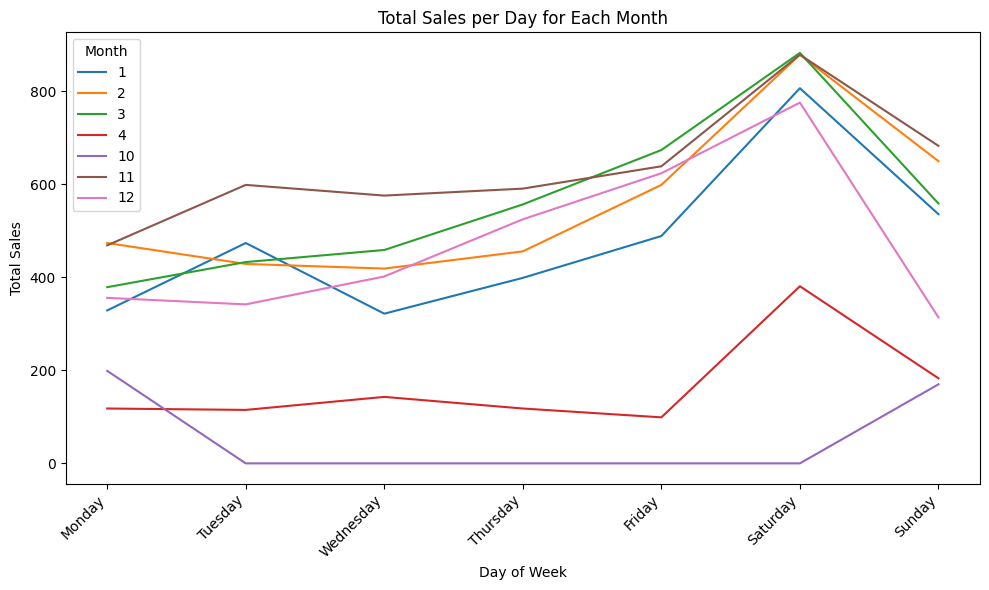

In [10]:
# 12
# Create the transaction table
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)

# Transpose the table for the desired plot
transaction_table = transaction_table.T
# Create the line chart
transaction_table.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')  # Changed x-axis label
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Month')  # Changed legend title
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

This visualization highlights the total sales trends by day of the week for each month. In most months, sales peak on Saturdays, consistently marking it as the busiest day. Sundays also show relatively strong sales in certain months, though not as consistently as Saturdays.

Weekday sales patterns vary across months. For instance, November demonstrates relatively stable sales throughout the week, whereas April maintains consistently low sales, potentially indicating a period of reduced activity or other influencing factors. October, on the other hand, shows little to no activity on weekdays, with a sharp increase on Sundays, possibly suggesting data collection issues or unique trends specific to this month.

Overall, the data underscores the critical role of weekends—particularly Saturdays—in driving sales, providing valuable insights for optimizing resource allocation, marketing strategies, and promotional campaigns to target high-traffic days.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [11]:
# 14
days_name = df['period_day'].unique()
print(days_name)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [12]:
# 15
hour_ranges = df.groupby('period_day')['hour'].unique()
print(hour_ranges)


period_day
afternoon    [12, 13, 14, 15, 16]
evening          [17, 18, 19, 20]
morning      [9, 10, 11, 8, 7, 1]
night                [21, 23, 22]
Name: hour, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

There are some unusual aspects in how the hours are grouped into periods of the day:

1. **Morning hours**: Including 1 a.m. in the "morning" category is unconventional, as it is generally considered part of the nighttime.  
2. **Order of hours**: The hours are not arranged chronologically, which can create confusion in understanding the groupings.  
3. **Inconsistent groupings**: Certain hours are assigned to periods that don't align with standard conventions, such as categorizing 1 a.m. as "morning" instead of "night."  

This highlights the need to reorganize the periods based on standard definitions. For example, "morning" could be defined as [5, 6, 7, 8, 9, 10, 11], while "night" should include earlier hours like 1 a.m.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


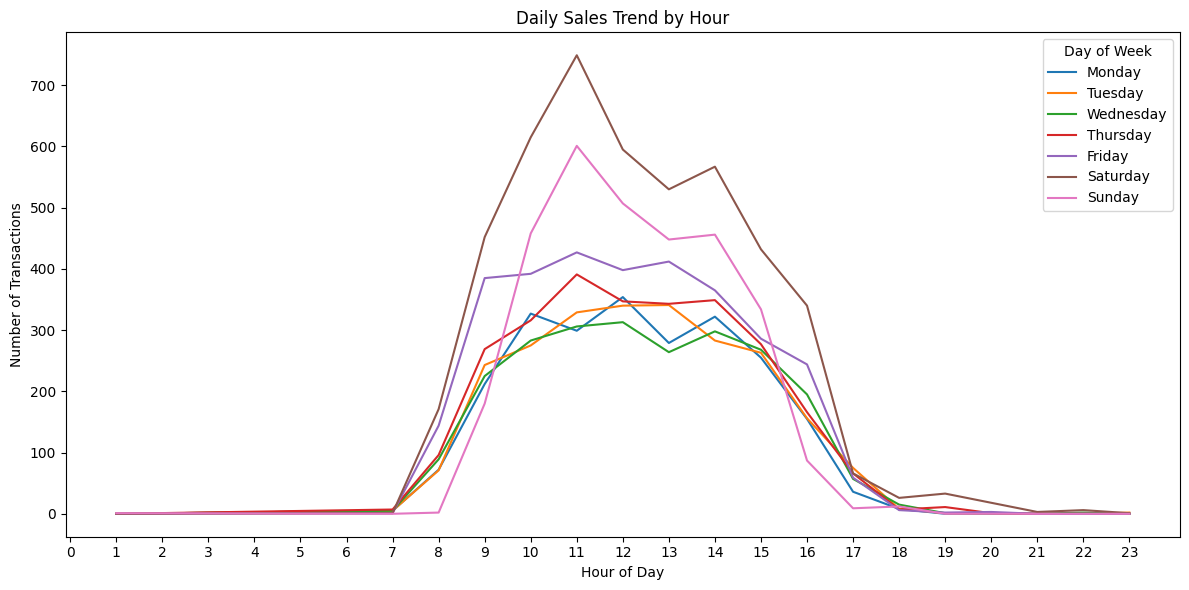

In [13]:
# 17
# Group by day and hour, then count transactions

daily_hourly_sales = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()



# Pivot the table for plotting

daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)



# Ensure days are in the desired order

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_hourly_sales = daily_hourly_sales[days_order]



# Create the line chart

daily_hourly_sales.plot(kind='line', figsize=(12, 6))

plt.title('Daily Sales Trend by Hour')

plt.xlabel('Hour of Day')

plt.ylabel('Number of Transactions')

plt.xticks(range(24))  # Set x-axis ticks for each hour

plt.legend(title='Day of Week')

plt.tight_layout()

plt.show()


18. The daily sales trend plot reveals that _______

The daily sales trend plot shows a consistent pattern throughout the week. Transactions begin to rise in the early morning (around 8 AM), reach their peak between late morning and early afternoon (10 AM to 2 PM), and gradually decline as the day progresses, with a sharp drop after 4 PM.

Saturdays stand out with the highest transaction peaks, making it the busiest day of the week. Fridays and Sundays also see relatively high activity, while midweek days like Tuesday and Wednesday show more moderate levels. This trend emphasizes the importance of allocating resources during peak hours, particularly on weekends, to maximize efficiency and sales.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


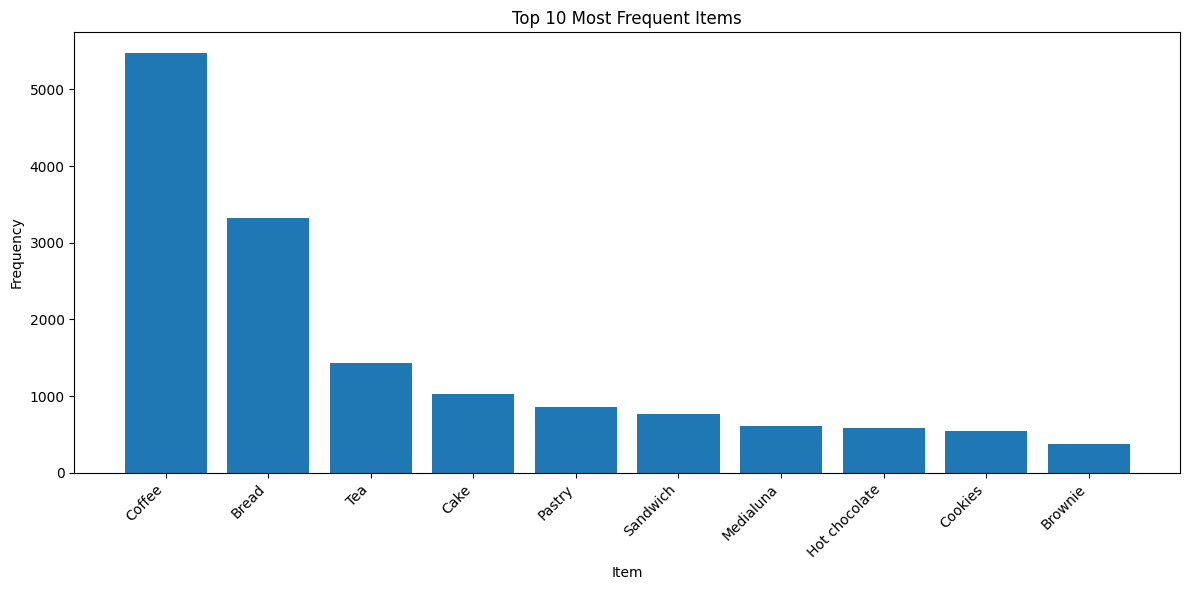

In [14]:
# 19
# Group by item and count occurrences
item_frequency = df.groupby('Item')['Transaction'].count().reset_index()

# Rename the 'Transaction' column to 'Frequency'
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})

# Sort by frequency in descending order
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


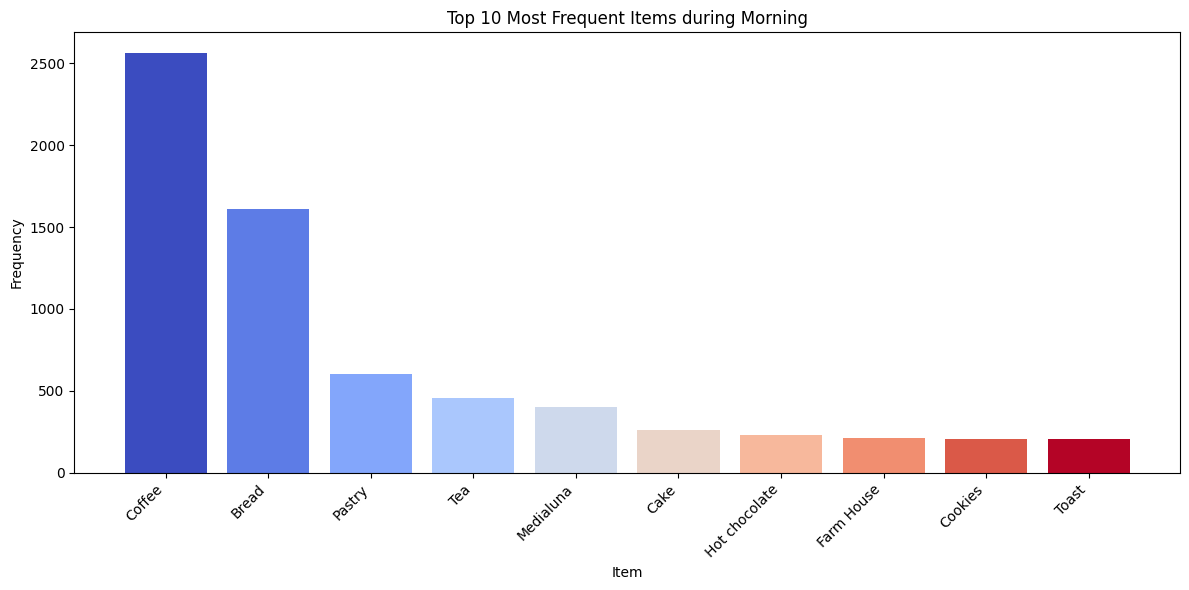

<ipython-input-15-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


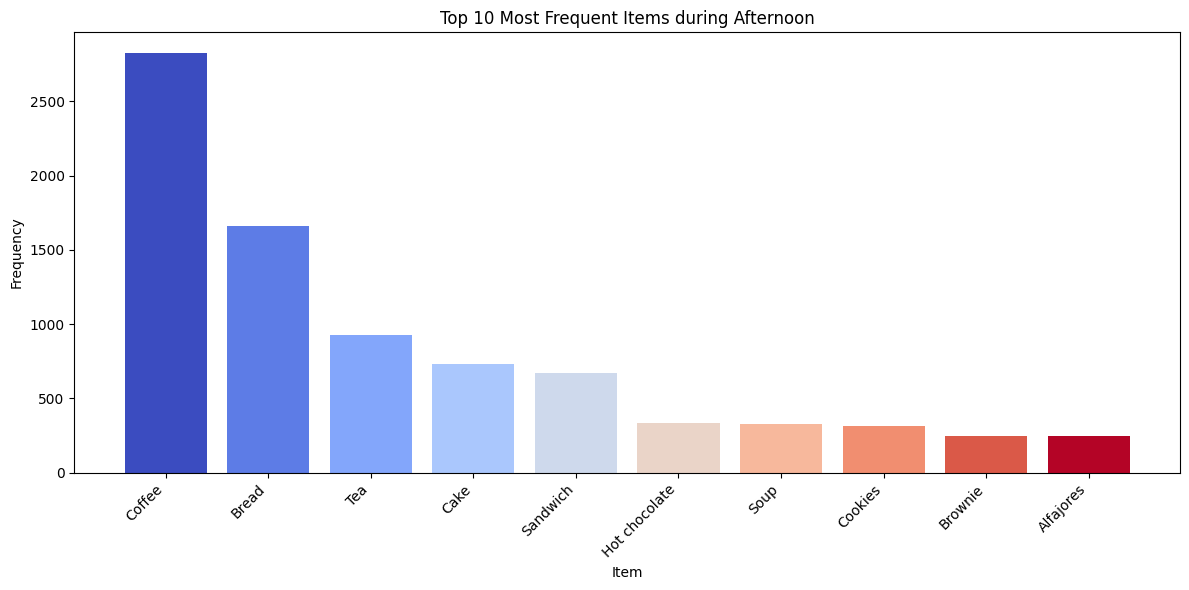

<ipython-input-15-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


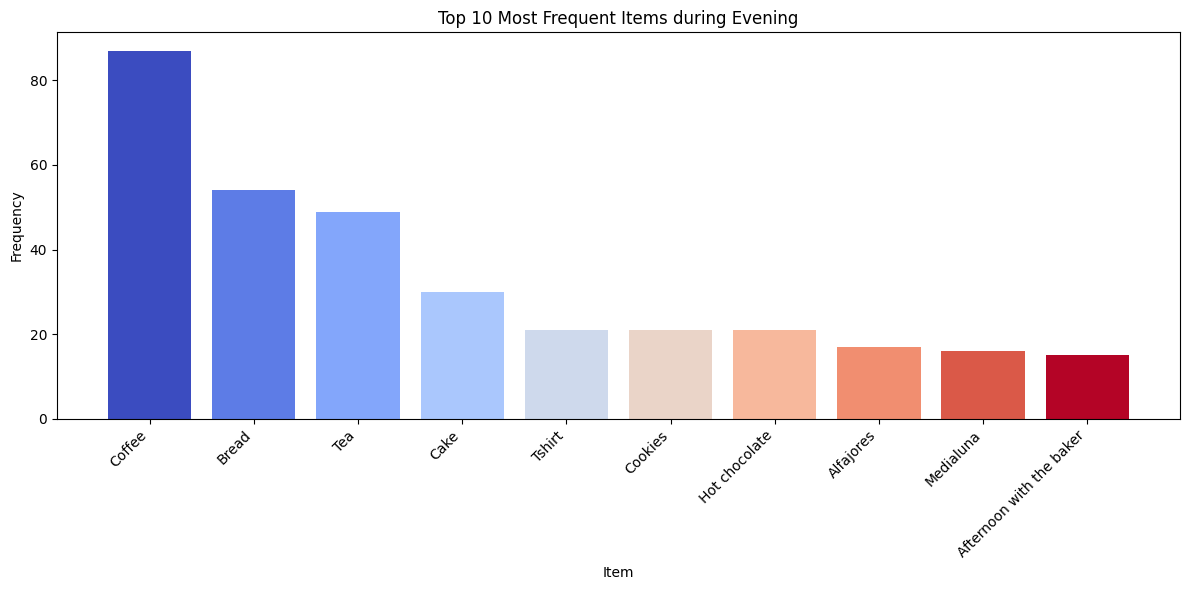

<ipython-input-15-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


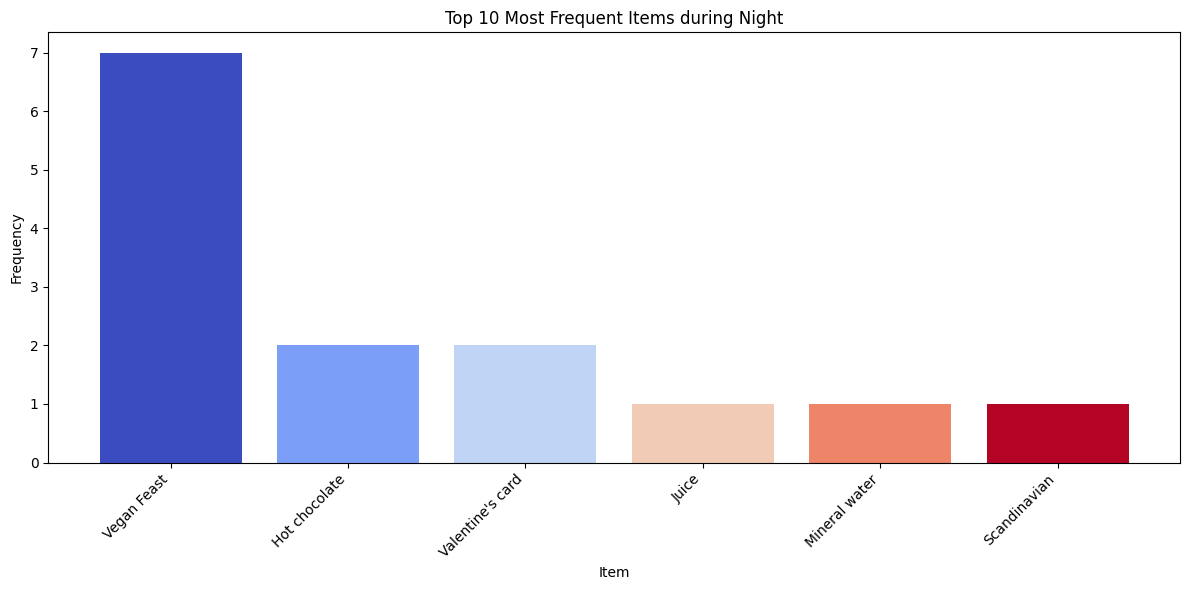

In [15]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    # Filter data for the specified period
    period_data = df[df['period_day'] == period]

    # Group by item and count occurrences for the period
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

    # Create a bar plot for the top 10 items in the period
    plt.figure(figsize=(12, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for each period
for period in df['period_day'].unique():
    plot_top_items_by_period(period)


21. It turns out that there is something different in the plot above, the insight is ____


The analysis reveals that each time period—morning, afternoon, evening, and night—exhibits distinct patterns in item sales, showcasing how consumer behavior shifts throughout the day. For example, mornings may see higher demand for items like coffee or breakfast-related products, aligning with daily routines and early-day preferences. In the afternoon, snacks or beverages might become more popular as people seek energy boosts or light meals. During the evening, dinner-related items or heavier snacks may see an uptick, catering to those winding down after work. At night, sales might be dominated by comfort food or late-night snacks, reflecting nighttime cravings.

These trends highlight how different time periods correspond to specific consumer needs and habits. Understanding these patterns enables businesses to optimize marketing strategies, promotions, and inventory management to match peak demand times, ensuring efficient resource allocation and minimizing overstock during quieter hours.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


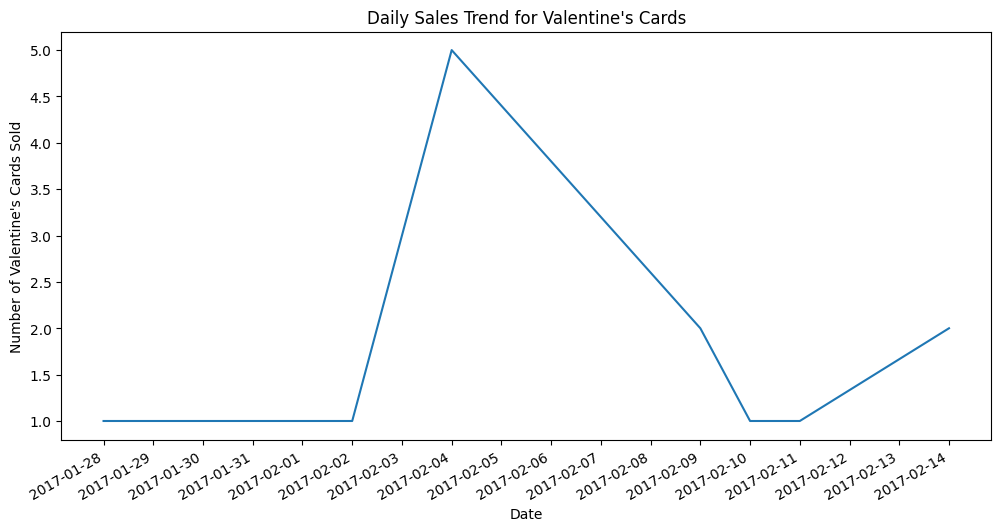

In [24]:
#22
# Assuming 'df' is your DataFrame as defined in the previous code.

# Filter transactions containing "Valentine's card"
valentines_card_transactions = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions
valentines_sales_by_date = valentines_card_transactions.groupby('date')['Transaction'].count()


# Plot daily transaction trends for Valentine's card
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title('Daily Sales Trend for Valentine\'s Cards')
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


The sales trend for Valentine’s cards shows a steady and low rate of sales from late January to early February, followed by a sharp increase around February 2nd, peaking on February 5th with over 5 cards sold per day. After the peak, sales gradually decline, reaching their lowest point by February 10th and 11th. However, there is a slight uptick in sales closer to Valentine’s Day, suggesting a last-minute rush from late buyers. Overall, the highest demand occurs about 10 days before Valentine’s Day.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [25]:
# 24
# Group data by 'Transaction' and 'Item' and sum quantities
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
df = df.drop_duplicates(subset=['Transaction', 'Item'])

# Create a pivot table to represent transactions
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#25
# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-26-85c49d3072ca>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [27]:
# 26
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [28]:
# 27
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Coffee is the most frequently associated item, appearing in multiple combinations with high support and confidence, such as with Cake, Cookies, and Juice. Many item pairings, like Coffee and Toast, exhibit a lift value greater than 1, indicating strong positive associations, while Coffee as a consequent consistently shows high confidence, reflecting its central role in purchases. Niche combinations, such as Hot Chocolate with Coffee and Medialuna with Coffee, suggest targeted marketing opportunities for specific customer preferences. These insights can inform sales strategies, including bundling Coffee with complementary items like Pastry or Cake, upselling items like Sandwiches with Coffee, and leveraging high-lift pairs like Coffee and Toast to design promotions. Additionally, low-support items like Medialuna, despite their niche appeal, represent opportunities for catering to specific customer segments. Overall, these findings can guide targeted marketing and promotional strategies to enhance sales.